In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, f_regression, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve,precision_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('application_data_cleanest.csv', index_col=0)

In [3]:
columns = df.columns

In [4]:
X = df[columns[:-1]]
y = df[columns[-1]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
smote = SMOTE(random_state=0, k_neighbors=10, n_jobs= 8, sampling_strategy=0.3)

In [7]:
%%time
X_smote, y_smote = smote.fit_resample(X_train,y_train)

Wall time: 1min 54s


In [8]:
fs_s=SelectKBest(f_regression, k = 25)
fs_s.fit(X_smote,y_smote.values.ravel())
features_s = X_smote.columns[fs_s.get_support()]
features_s

Index(['NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'ORGANIZATION_TYPE_NA', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8'],
      dtype='object')

In [9]:
Xs_train=X_smote[features_s]
xgb_smote=XGBClassifier(random_state=1223,n_jobs = 8, eta = 0.1, gamma=5, scale_pos_weight=0.7)

In [10]:
%%time
xgb_smote.fit(Xs_train, y_smote)

Wall time: 8.29 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=1223, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.7, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [11]:
X_fs_s = X_test[features_s]

Wall time: 515 ms


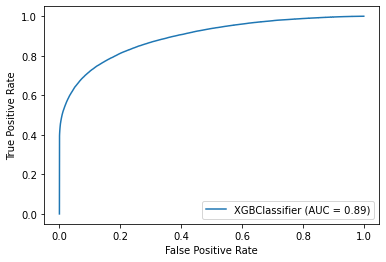

In [12]:
%%time
plot_roc_curve(xgb_smote, Xs_train, y_smote)

Wall time: 155 ms


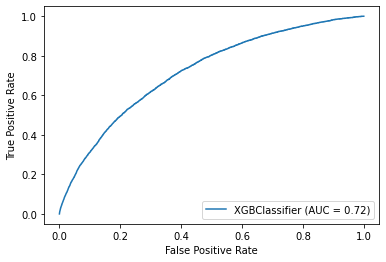

In [13]:
%%time
plot_roc_curve(xgb_smote, X_fs_s, y_test)

In [14]:
adasyn=ADASYN(random_state=0, n_jobs= 8, sampling_strategy= 0.2)

In [15]:
%%time
X_adasyn, y_adasyn = adasyn.fit_resample(X_train,y_train)

Wall time: 6min 59s


In [16]:
fs_a=SelectKBest(f_regression, k = 25)
fs_a.fit(X_adasyn,y_adasyn.values.ravel())
features_a = X_adasyn.columns[fs_a.get_support()]
features_a

Index(['NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'ORGANIZATION_TYPE_NA', 'ORGANIZATION_TYPE_Self-employed', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_EMP_PHONE',
       'FLAG_PHONE', 'FLAG_DOCUMENT_6'],
      dtype='object')

In [17]:
Xa_train=X_adasyn[features_a]
xgb_adasyn=XGBClassifier(random_state=1223,n_jobs = 8, eta = 0.1, gamma=5, scale_pos_weight=0.7)

In [22]:
%%time
xgb_adasyn.fit(Xa_train, y_adasyn)

Wall time: 7.25 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=1223, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.7, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [23]:
X_fs_a = X_test[features_a]

Wall time: 435 ms


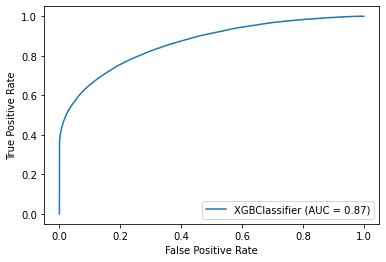

In [24]:
%%time
plot_roc_curve(xgb_adasyn, Xa_train, y_adasyn)

Wall time: 114 ms


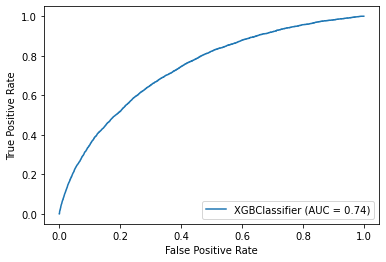

In [25]:
%%time
plot_roc_curve(xgb_adasyn, X_fs_a, y_test)